# Financial Risk Analysis with Python(Goldman Sachs Financial Analysis Dataset)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('goldman_sachs.csv')
df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,33,CUST6549,ACC12334,Credit,Withdrawal,Savings Account,Firm C,Central,Manager 1,21-10-2023,87480.05448,74008.43310,0.729101,319,200
1,177,CUST2942,ACC52650,Credit,Withdrawal,Home Loan,Firm A,East,Manager 3,20-06-2023,20315.74505,22715.83590,0.472424,692,47
2,178,CUST6776,ACC45101,Current,Deposit,Personal Loan,Firm C,South,Manager 3,02-01-2023,10484.57165,42706.09210,0.648784,543,109
3,173,CUST2539,ACC88252,Current,Withdrawal,Mutual Fund,Firm A,Central,Manager 2,25-07-2023,45122.27373,114176.56870,0.734832,430,103
4,67,CUST2626,ACC21878,Savings,Withdrawal,Home Loan,Firm C,Central,Manager 4,25-07-2023,42360.79878,17863.02644,0.289304,468,234


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      800 non-null    int64  
 1   CustomerID         800 non-null    object 
 2   AccountID          800 non-null    object 
 3   AccountType        800 non-null    object 
 4   TransactionType    800 non-null    object 
 5   Product            800 non-null    object 
 6   Firm               800 non-null    object 
 7   Region             800 non-null    object 
 8   Manager            800 non-null    object 
 9   TransactionDate    800 non-null    object 
 10  TransactionAmount  800 non-null    float64
 11  AccountBalance     800 non-null    float64
 12  RiskScore          800 non-null    float64
 13  CreditRating       800 non-null    int64  
 14  TenureMonths       800 non-null    int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 93.9+ KB


In [4]:
df.isnull().sum()

TransactionID        0
CustomerID           0
AccountID            0
AccountType          0
TransactionType      0
Product              0
Firm                 0
Region               0
Manager              0
TransactionDate      0
TransactionAmount    0
AccountBalance       0
RiskScore            0
CreditRating         0
TenureMonths         0
dtype: int64

In [5]:
for col in df.columns:
    if df[col].nunique()<10:
        print(df[col].value_counts())
        print("--"*40)

AccountType
Loan       218
Credit     206
Savings    204
Current    172
Name: count, dtype: int64
--------------------------------------------------------------------------------
TransactionType
Withdrawal    207
Payment       200
Deposit       199
Transfer      194
Name: count, dtype: int64
--------------------------------------------------------------------------------
Product
Home Loan          176
Credit Card        168
Mutual Fund        162
Personal Loan      153
Savings Account    141
Name: count, dtype: int64
--------------------------------------------------------------------------------
Firm
Firm B    168
Firm C    165
Firm D    164
Firm E    153
Firm A    150
Name: count, dtype: int64
--------------------------------------------------------------------------------
Region
West       176
East       162
South      158
North      156
Central    148
Name: count, dtype: int64
--------------------------------------------------------------------------------
Manager
Manager 1    218


In [6]:
df.duplicated().sum()

# If duplicates exist and you want to drop:
df = df.drop_duplicates()
df.shape

(800, 15)

***Task 1: Data Cleaning and Formatting***

● Remove/treat any special characters or non-numeric entries from financial fields.

● Convert currency amounts into numerical format.

● Validate and format date columns.

● Ensure account types and transaction categories are standardized.

In [7]:
# type 1.1 ● Remove/treat any special characters or non-numeric entries from financial fields.
df["TransactionAmount"]=df["TransactionAmount"].abs()

financial_cols = ["TransactionAmount", "AccountBalance"]
for col in financial_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
df.columns
df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths
0,33,CUST6549,ACC12334,Credit,Withdrawal,Savings Account,Firm C,Central,Manager 1,21-10-2023,87480.05448,74008.43310,0.729101,319,200
1,177,CUST2942,ACC52650,Credit,Withdrawal,Home Loan,Firm A,East,Manager 3,20-06-2023,20315.74505,22715.83590,0.472424,692,47
2,178,CUST6776,ACC45101,Current,Deposit,Personal Loan,Firm C,South,Manager 3,02-01-2023,10484.57165,42706.09210,0.648784,543,109
3,173,CUST2539,ACC88252,Current,Withdrawal,Mutual Fund,Firm A,Central,Manager 2,25-07-2023,45122.27373,114176.56870,0.734832,430,103
4,67,CUST2626,ACC21878,Savings,Withdrawal,Home Loan,Firm C,Central,Manager 4,25-07-2023,42360.79878,17863.02644,0.289304,468,234


In [8]:
# step 1.2 ● Convert currency amounts into numerical format.
df.columns = df.columns.str.strip()

text_cols = df.select_dtypes(include="object").columns
df[text_cols] = df[text_cols].apply(lambda s: s.str.strip())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      800 non-null    int64  
 1   CustomerID         800 non-null    object 
 2   AccountID          800 non-null    object 
 3   AccountType        800 non-null    object 
 4   TransactionType    800 non-null    object 
 5   Product            800 non-null    object 
 6   Firm               800 non-null    object 
 7   Region             800 non-null    object 
 8   Manager            800 non-null    object 
 9   TransactionDate    800 non-null    object 
 10  TransactionAmount  800 non-null    float64
 11  AccountBalance     800 non-null    float64
 12  RiskScore          800 non-null    float64
 13  CreditRating       800 non-null    int64  
 14  TenureMonths       800 non-null    int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 93.9+ KB


In [9]:
# step 1.3 ● Validate and format date columns.
df["TransactionDate"]=df["TransactionDate"].apply(pd.to_datetime,format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TransactionID      800 non-null    int64         
 1   CustomerID         800 non-null    object        
 2   AccountID          800 non-null    object        
 3   AccountType        800 non-null    object        
 4   TransactionType    800 non-null    object        
 5   Product            800 non-null    object        
 6   Firm               800 non-null    object        
 7   Region             800 non-null    object        
 8   Manager            800 non-null    object        
 9   TransactionDate    800 non-null    datetime64[ns]
 10  TransactionAmount  800 non-null    float64       
 11  AccountBalance     800 non-null    float64       
 12  RiskScore          800 non-null    float64       
 13  CreditRating       800 non-null    int64         
 14  TenureMont

In [10]:
# step 1.4 ● Ensure account types and transaction categories are standardized.

df["AccountType"]=df["AccountType"].str.strip().str.title()
df["TransactionType"]=df["TransactionType"].str.strip().str.title()
df[["TransactionType","AccountType"]]

,TransactionType,AccountType
0,Withdrawal,Credit
1,Withdrawal,Credit
2,Deposit,Current
3,Withdrawal,Current
4,Withdrawal,Savings
...,...,...
795,Withdrawal,Current
796,Withdrawal,Credit
797,Payment,Current
798,Payment,Current


***Task 2: Descriptive Transactional Analysis***

● Calculate monthly and yearly summaries of total credits, debits, and net transaction volume.

● Plot trends in total credits vs. debits over time.

● Identify top and bottom performing accounts based on net inflow.

● Identify and flag accounts as dormant or inactive if there is a gap of two months or more between consecutive transactions.

In [11]:
# 2.1 ● Calculate monthly and yearly summaries of total credits, debits, and net transaction volume. 
credit_keywords = {"deposit"}
debit_keywords  = {"withdrawal", "transfer", "payment"}

#Separate Credit and Debit amounts

df["Credit"] = np.where(
    df["TransactionType"].str.title() == "deposit",
    df["TransactionAmount"],
    0
)

df["Debit"] = np.where(
    df["TransactionType"].str.title() == "withdrawal",
    df["TransactionAmount"],
    0
)

df[["TransactionType", "TransactionAmount", "Credit", "Debit"]].head()


def txn_sign(txn_type: str) -> int:
    t = str(txn_type).lower()
    if any(k in t for k in debit_keywords): 
        return -1
    if any(k in t for k in credit_keywords): 
        return 1
    return 1  # default if unknown (or set 0)

df["Sign"] = df["TransactionType"].apply(txn_sign)
df["NetAmount"] = df["TransactionAmount"] * df["Sign"]

df["Year"] = df["TransactionDate"].dt.year
df["Month"] = df["TransactionDate"].dt.to_period("M").astype(str)

monthly = df.groupby("Month").agg(
    TotalCredits=("TransactionAmount", lambda s: s[df.loc[s.index, "Sign"]==1].sum()),
    TotalDebits=("TransactionAmount",  lambda s: s[df.loc[s.index, "Sign"]==-1].sum()),
    Net=("NetAmount","sum")
).reset_index()

yearly = df.groupby("Year").agg(
    TotalCredits=("TransactionAmount", lambda s: s[df.loc[s.index, "Sign"]==1].sum()),
    TotalDebits=("TransactionAmount",  lambda s: s[df.loc[s.index, "Sign"]==-1].sum()),
    Net=("NetAmount","sum")
).reset_index()

df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,...,AccountBalance,RiskScore,CreditRating,TenureMonths,Credit,Debit,Sign,NetAmount,Year,Month
0,33,CUST6549,ACC12334,Credit,Withdrawal,Savings Account,Firm C,Central,Manager 1,2023-10-21,...,74008.43310,0.729101,319,200,0.0,0.0,-1,-87480.05448,2023,2023-10
1,177,CUST2942,ACC52650,Credit,Withdrawal,Home Loan,Firm A,East,Manager 3,2023-06-20,...,22715.83590,0.472424,692,47,0.0,0.0,-1,-20315.74505,2023,2023-06
2,178,CUST6776,ACC45101,Current,Deposit,Personal Loan,Firm C,South,Manager 3,2023-01-02,...,42706.09210,0.648784,543,109,0.0,0.0,1,10484.57165,2023,2023-01
3,173,CUST2539,ACC88252,Current,Withdrawal,Mutual Fund,Firm A,Central,Manager 2,2023-07-25,...,114176.56870,0.734832,430,103,0.0,0.0,-1,-45122.27373,2023,2023-07
4,67,CUST2626,ACC21878,Savings,Withdrawal,Home Loan,Firm C,Central,Manager 4,2023-07-25,...,17863.02644,0.289304,468,234,0.0,0.0,-1,-42360.79878,2023,2023-07


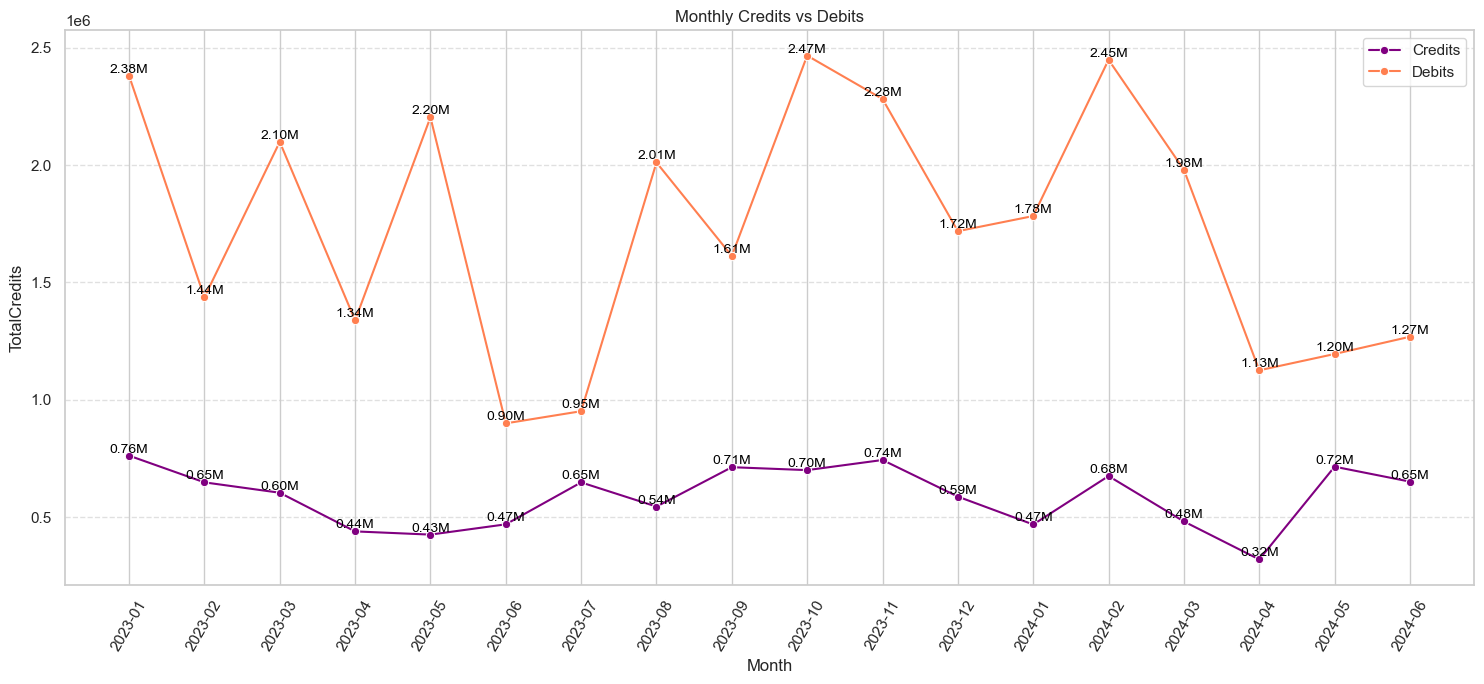

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Force white background everywhere
sns.set_theme(style="whitegrid")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

plt.figure(figsize=(15, 7))

# Credits line
sns.lineplot(
    data=monthly,
    x="Month",
    y="TotalCredits",
    marker="o",
    linestyle="-",
    label="Credits",
    color="purple"
)

# Debits line
sns.lineplot(
    data=monthly,
    x="Month",
    y="TotalDebits",
    marker="o",
    linestyle="-",
    label="Debits",
    color="coral"
)

plt.xticks(rotation=60)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.title("Monthly Credits vs Debits")
plt.legend()

# Credit labels
for x, y in zip(monthly["Month"], monthly["TotalCredits"]):
    plt.text(
        x, y,
        f"{y/1e6:.2f}M",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black"
    )

# Debit labels
for x, y in zip(monthly["Month"], monthly["TotalDebits"]):
    plt.text(
        x, y,
        f"{y/1e6:.2f}M",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black"
    )

plt.tight_layout()
plt.show()


In [13]:
# step 2.3 ● Identify top and bottom performing accounts based on net inflow.
# Identify Top Performing Accounts
top_accounts = df.sort_values(
    by='NetAmount',
    ascending=False
).head(5)

# Identify Bottom Performing Accounts
bottom_accounts = df.sort_values(
    by='NetAmount',
    ascending=True
).head(5)

print(f"Top Performing Accounts:\n{top_accounts[['AccountBalance', 'NetAmount']]}")

print(f"\n Bottom Performing Accounts:\n{bottom_accounts[['AccountBalance', 'NetAmount']]}")


Top Performing Accounts:
     AccountBalance    NetAmount
741     51092.98942  130149.3799
237     33532.61157  127718.9013
234     93754.78157  122856.4830
379     42088.94404  118019.7086
269     32952.55399  113221.7353

 Bottom Performing Accounts:
     AccountBalance    NetAmount
790   116386.890400 -130726.9141
80     14174.176850 -130475.1663
338    42085.195500 -129983.6051
319   150199.078600 -128816.2360
320     9228.815058 -127907.5731


In [14]:
# step 2.4 ● Identify and flag accounts as dormant or inactive if there is a gap of two months or more between consecutive transactions.
df_sorted = df.sort_values(["AccountID", "TransactionDate"])
df_sorted["PrevDate"] = df_sorted.groupby("AccountID")["TransactionDate"].shift(1)
df_sorted["GapDays"] = (df_sorted["TransactionDate"] - df_sorted["PrevDate"]).dt.days

# ~60 days as 2 months (simple rule)
df_sorted["DormantFlag"] = df_sorted["GapDays"] >= 60

dormant_accounts = (df_sorted.groupby("AccountID")["DormantFlag"].any()
                    .reset_index(name="IsDormant"))


df.head()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,...,AccountBalance,RiskScore,CreditRating,TenureMonths,Credit,Debit,Sign,NetAmount,Year,Month
0,33,CUST6549,ACC12334,Credit,Withdrawal,Savings Account,Firm C,Central,Manager 1,2023-10-21,...,74008.43310,0.729101,319,200,0.0,0.0,-1,-87480.05448,2023,2023-10
1,177,CUST2942,ACC52650,Credit,Withdrawal,Home Loan,Firm A,East,Manager 3,2023-06-20,...,22715.83590,0.472424,692,47,0.0,0.0,-1,-20315.74505,2023,2023-06
2,178,CUST6776,ACC45101,Current,Deposit,Personal Loan,Firm C,South,Manager 3,2023-01-02,...,42706.09210,0.648784,543,109,0.0,0.0,1,10484.57165,2023,2023-01
3,173,CUST2539,ACC88252,Current,Withdrawal,Mutual Fund,Firm A,Central,Manager 2,2023-07-25,...,114176.56870,0.734832,430,103,0.0,0.0,-1,-45122.27373,2023,2023-07
4,67,CUST2626,ACC21878,Savings,Withdrawal,Home Loan,Firm C,Central,Manager 4,2023-07-25,...,17863.02644,0.289304,468,234,0.0,0.0,-1,-42360.79878,2023,2023-07


***Task 3: Customer Profile Building***

● Group accounts by activity levels: High, Medium, Low based on transaction frequency on your analysis and rubrics. Do not forget to mention the rubric in the headings.

● Segment customers by average balance and transaction volume.

● Create profiles for:

    ○ High-net inflow accounts

    ○ High-frequency low-balance accounts

    ○ Accounts with negative or near-zero balances

In [15]:
# step 3.1 ● Group accounts by activity levels: High, Medium, Low based on transaction frequency on your 
#            analysis and rubrics.Do not forget to mention the rubric in the headings.

txn_freq = (df.groupby(["CustomerID", "Month"])
              .size()
              .reset_index(name="TxnCount"))

avg_monthly_txn = txn_freq.groupby("CustomerID")["TxnCount"].mean().reset_index(name="AvgMonthlyTxn")

print(avg_monthly_txn)

    CustomerID  AvgMonthlyTxn
0     CUST1042       1.142857
1     CUST1114       1.333333
2     CUST1121       1.333333
3     CUST1189       1.000000
4     CUST1223       1.000000
..         ...            ...
183   CUST9683       1.750000
184   CUST9731       1.500000
185   CUST9754       1.333333
186   CUST9843       1.000000
187   CUST9962       1.666667

[188 rows x 2 columns]


In [16]:

df["CustomerID"].nunique()

188

In [17]:
txn_freq = (df.groupby(["CustomerID", "Month"])
              .value_counts()
              .reset_index(name="TxnCount"))

avg_monthly_txn = txn_freq.groupby("CustomerID")["TxnCount"].mean().reset_index(name="AvgMonthlyTxn")

def activity_level(x):
    if x >= 20: return "High"
    if x >= 5:  return "Medium"
    return "Low"

avg_monthly_txn["ActivityLevel"] = avg_monthly_txn["AvgMonthlyTxn"].apply(activity_level)


print(avg_monthly_txn["ActivityLevel"].tail(100))

88     Low
89     Low
90     Low
91     Low
92     Low
      ... 
183    Low
184    Low
185    Low
186    Low
187    Low
Name: ActivityLevel, Length: 100, dtype: object


In [42]:
# step 3.2 ● Segment customers by average balance and transaction volume.
account_metrics = (
    df.groupby("AccountID")
      .agg(
          Total_Credit=("Credit", "sum"),
          Total_Debit=("Debit", "sum"),
          Transaction_Volume=("TransactionAmount", "sum")
      )
      .assign(Net_Inflow=lambda x: x["Total_Credit"] - x["Total_Debit"])
      .reset_index()
)

account_metrics.head()

,AccountID,Total_Credit,Total_Debit,Transaction_Volume,Net_Inflow
0,ACC10117,0.0,0.0,199480.967430,0.0
1,ACC10996,0.0,0.0,250739.550950,0.0
2,ACC11062,0.0,0.0,27189.136160,0.0
3,ACC11188,0.0,0.0,257576.603590,0.0
4,ACC11285,0.0,0.0,96729.609841,0.0


In [44]:
# step 3.3  ● Create profiles for:

        # a:) ○ High-net inflow accounts:

# Quantiles
high_inflow = account_metrics["Net_Inflow"].quantile(0.75)
low_inflow = account_metrics["Net_Inflow"].quantile(0.25)

high_volume = account_metrics["Transaction_Volume"].quantile(0.75)
low_volume = account_metrics["Transaction_Volume"].quantile(0.25)

# Segmentation function
def segment_customer(row):
    if (row["Net_Inflow"] >= high_inflow) or (row["Transaction_Volume"] >= high_volume):
        return "High Value"
    elif (row["Net_Inflow"] <= low_inflow) or (row["Transaction_Volume"] <= low_volume):
        return "Low Value"
    else:
        return "Medium Value"

# Apply
account_metrics["Customer_Segment"] = account_metrics.apply(segment_customer, axis=1)

account_metrics.head()


,AccountID,Total_Credit,Total_Debit,Transaction_Volume,Net_Inflow,Customer_Segment
0,ACC10117,0.0,0.0,199480.967430,0.0,High Value
1,ACC10996,0.0,0.0,250739.550950,0.0,High Value
2,ACC11062,0.0,0.0,27189.136160,0.0,High Value
3,ACC11188,0.0,0.0,257576.603590,0.0,High Value
4,ACC11285,0.0,0.0,96729.609841,0.0,High Value


In [20]:
account_metrics = (
    df.groupby("AccountID")
    .agg(
        avg_balance=("AccountBalance", "mean"),
        transaction_volume=("TransactionAmount", "sum")
    )
    .reset_index()
)

account_metrics.head()


,AccountID,avg_balance,transaction_volume
0,ACC10117,70107.007957,199480.967430
1,ACC10996,43568.008084,250739.550950
2,ACC11062,38137.132610,27189.136160
3,ACC11188,69652.151044,257576.603590
4,ACC11285,97401.348560,96729.609841


In [45]:
# b:) ○ High-frequency low-balance accounts:

cust_summary = df.groupby("CustomerID").agg(
    AvgBalance=("AccountBalance","mean"),
    TotalVolume=("TransactionAmount","sum"),
    TotalNet=("NetAmount","sum"),
    TxnCount=("TransactionID","count")
).reset_index()

# Simple quantile segmentation

cust_summary["BalanceSegment"] = pd.qcut(cust_summary["AvgBalance"], 3, labels=["LowBal","MidBal","HighBal"])
cust_summary["VolumeSegment"]  = pd.qcut(cust_summary["TotalVolume"], 3, labels=["LowVol","MidVol","HighVol"])

print(cust_summary["BalanceSegment"],cust_summary["VolumeSegment"])

0      HighBal
1       LowBal
2      HighBal
3       LowBal
4      HighBal
        ...   
183     MidBal
184    HighBal
185    HighBal
186     MidBal
187    HighBal
Name: BalanceSegment, Length: 188, dtype: category
Categories (3, object): ['LowBal' < 'MidBal' < 'HighBal'] 0      HighVol
1      HighVol
2      HighVol
3       LowVol
4       LowVol
        ...   
183    HighVol
184    HighVol
185     MidVol
186     MidVol
187    HighVol
Name: VolumeSegment, Length: 188, dtype: category
Categories (3, object): ['LowVol' < 'MidVol' < 'HighVol']


In [46]:
#c:) ○ Accounts with negative or near-zero balances:

high_net_inflow = cust_summary.sort_values("TotalNet", ascending=False).head(20)

high_freq_low_bal = cust_summary[
    (cust_summary["TxnCount"] >= cust_summary["TxnCount"].quantile(0.75)) &
    (cust_summary["AvgBalance"] <= cust_summary["AvgBalance"].quantile(0.25))
]

neg_or_near_zero = cust_summary[cust_summary["AvgBalance"] <= 0]

print(high_freq_low_bal)

    CustomerID    AvgBalance    TotalVolume       TotalNet  TxnCount  \
1     CUST1114  60127.893845  385802.565919 -268029.670739         8   
53    CUST3059  59259.390588  296413.616370 -296413.616370         6   
54    CUST3069  48347.423620  179440.309010  -97487.457390         5   
80    CUST4584  52584.244758  298235.343843  -64988.794803         5   
94    CUST5253  47802.857312  177843.520130 -157496.948350         5   
99    CUST5428  58148.843446  261052.014510 -212246.224430         8   
101   CUST5545  61151.359039  265333.196444 -265333.196444         7   
109   CUST5912  61966.849233  354409.131240 -172474.809920         6   
111   CUST5920  61623.184390  554945.597570 -338546.753770         7   
130   CUST6937  52171.166596  220399.339887  -36247.379153         5   
153   CUST8155  49397.810737  266000.319070 -139503.197730         5   
154   CUST8250  51282.494454  243326.951520 -158946.685580         5   
157   CUST8288  59954.562314  346459.485800 -275515.697980      

***Task 4: Financial Risk Identification***

● Track accounts with frequent large withdrawals or overdrafts.

● Calculate balance volatility using standard deviation or coefficient of variation.

● Use IQR or z-score methods to detect anomalies.

● Highlight customers with irregular or suspicious transaction behavior.

In [23]:
# step 4.1 ● Track accounts with frequent large withdrawals or overdrafts.
withdrawals = df[df["TransactionType"].str.contains("withdraw", na=False)]
threshold = withdrawals["TransactionAmount"].quantile(0.90)

large_withdrawals = withdrawals[withdrawals["TransactionAmount"] >= threshold]

large_withdrawals_by_acct = large_withdrawals.groupby("AccountID").size().reset_index(name="LargeWithdrawalCount")

# Overdraft proxy: negative balance
overdraft_accts = df[df["AccountBalance"] < 0].groupby("AccountID").size().reset_index(name="OverdraftTxnCount")

print(overdraft_accts)
print(large_withdrawals_by_acct)

   AccountID  OverdraftTxnCount
0   ACC16241                  1
1   ACC19178                  1
2   ACC23736                  1
3   ACC26973                  1
4   ACC28154                  1
5   ACC28292                  2
6   ACC29477                  1
7   ACC33287                  1
8   ACC49774                  1
9   ACC58667                  1
10  ACC70314                  1
11  ACC77533                  1
12  ACC83005                  1
13  ACC88449                  1
14  ACC94242                  1
Empty DataFrame
Columns: [AccountID, LargeWithdrawalCount]
Index: []


In [24]:
# step 4.2 ● Calculate balance volatility using standard deviation or coefficient of variation.

bal_vol = df.groupby("AccountID")["AccountBalance"].agg(["mean","std"]).reset_index()
bal_vol["CV"] = bal_vol["std"] / bal_vol["mean"].replace(0, np.nan)

print(bal_vol)

    AccountID          mean           std        CV
0    ACC10117  70107.007957  25886.972758  0.369249
1    ACC10996  43568.008084   9434.002316  0.216535
2    ACC11062  38137.132610   3208.737888  0.084137
3    ACC11188  69652.151044  35494.660810  0.509599
4    ACC11285  97401.348560  55922.732441  0.574147
..        ...           ...           ...       ...
189  ACC97225  38652.306677  28069.592780  0.726207
190  ACC97411  55978.315635   7871.678922  0.140620
191  ACC99117  47228.185087  20780.582578  0.440004
192  ACC99409  83743.915565  21429.756821  0.255896
193  ACC99549  68641.201433  26251.797058  0.382450

[194 rows x 4 columns]


In [25]:
# step 4.3  ● Use IQR or z-score methods to detect anomalies.

# z-score :
import scipy.stats as stats

df['tZScore'] = np.abs(stats.zscore(df['TransactionAmount']))
z_anomalies = df[df['tZScore'] > 3]
print(f"Z-score anomalies (>3): {len(z_anomalies)}")
print(df['tZScore'])

print("--"*50)

df['aZScore'] = np.abs(stats.zscore(df['AccountBalance']))
z_anomalies = df[df['aZScore'] > 3]
print(f"Z-score anomalies (>3): {len(z_anomalies)}")
print( df['aZScore'])

Z-score anomalies (>3): 0
0      1.266887
1      1.148219
2      1.501730
3      0.256222
4      0.355519
         ...   
795    2.431868
796    1.642768
797    0.389231
798    0.969360
799    1.018040
Name: tZScore, Length: 800, dtype: float64
----------------------------------------------------------------------------------------------------
Z-score anomalies (>3): 3
0      0.048835
1      1.457611
2      0.870504
3      1.228560
4      1.600137
         ...   
795    0.008947
796    0.762771
797    1.094223
798    0.926659
799    0.368842
Name: aZScore, Length: 800, dtype: float64


In [47]:
# step 4.4 ● Highlight customers with irregular or suspicious transaction behavior.

customer_stats = (
    df.groupby("CustomerID")["TransactionAmount"]
      .agg(["mean", "std"])
      .reset_index()
)

print(customer_stats)

    CustomerID          mean           std
0     CUST1042  54043.209545  30565.484684
1     CUST1114  48225.320740  26398.893405
2     CUST1121  99551.279378   6457.060342
3     CUST1189  39113.139630  14202.571329
4     CUST1223  33888.232900  21109.744323
..         ...           ...           ...
183   CUST9683  38898.896979  21953.451838
184   CUST9731  62775.094836  39174.186502
185   CUST9754  23692.643309  13341.603086
186   CUST9843  50033.957967  17746.697147
187   CUST9962  57530.183012  39028.819945

[188 rows x 3 columns]


In [27]:
df = df.drop(columns=["mean", "std"], errors="ignore")
df = df.merge(customer_stats, on="CustomerID", how="left")
df.tail()

,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,...,Credit,Debit,Sign,NetAmount,Year,Month,tZScore,aZScore,mean,std
795,11,CUST8461,ACC60432,Current,Withdrawal,Credit Card,Firm E,Central,Manager 3,2023-02-17,...,0.0,0.0,-1,-119878.30500,2023,2023-02,2.431868,0.008947,67366.950678,30873.604610
796,44,CUST1121,ACC41829,Credit,Withdrawal,Personal Loan,Firm C,East,Manager 4,2023-10-26,...,0.0,0.0,-1,-97933.33752,2023,2023-10,1.642768,0.762771,99551.279378,6457.060342
797,160,CUST3059,ACC28292,Current,Payment,Mutual Fund,Firm E,South,Manager 4,2023-05-11,...,0.0,0.0,-1,-63072.38174,2023,2023-05,0.389231,1.094223,49402.269395,15749.162855
798,37,CUST1042,ACC28295,Current,Payment,Personal Loan,Firm E,West,Manager 3,2023-03-26,...,0.0,0.0,-1,-25289.82472,2023,2023-03,0.969360,0.926659,54043.209545,30565.484684
799,101,CUST2464,ACC53865,Loan,Deposit,Mutual Fund,Firm C,South,Manager 4,2023-07-19,...,0.0,0.0,1,23936.04314,2023,2023-07,1.018040,0.368842,61122.651830,38672.144922


In [28]:
df["std"] = df["std"].fillna(0)

In [29]:
df["Suspicious_Flag"] = np.where(
    df["TransactionAmount"] > (df["mean"] + 3 * df["std"]),
    "Suspicious",
    "Normal"
)

In [30]:
suspicious_customers = df[df["Suspicious_Flag"] == "Suspicious"][
    ["CustomerID", "TransactionAmount", "mean", "std"]
]
print(suspicious_customers)

Empty DataFrame
Columns: [CustomerID, TransactionAmount, mean, std]
Index: []


Task 5: Visualisation

● Conduct extensive exploratory data analysis with attractive visualizations for your findings

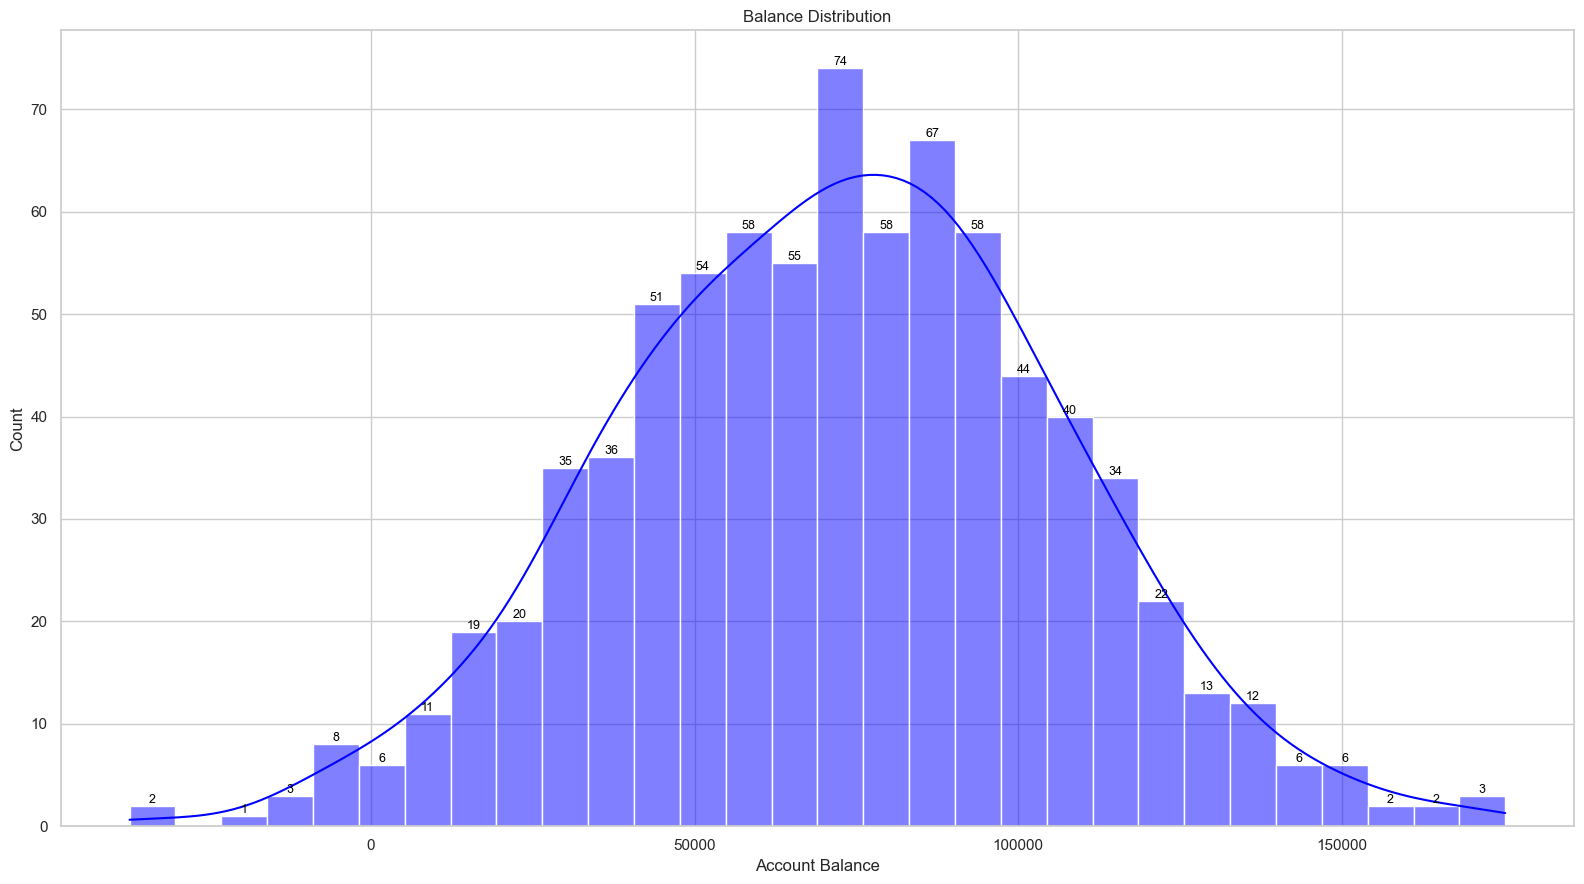

In [31]:
# step 5.1 ● Conduct extensive exploratory data analysis with attractive visualizations for your findings.

## histrogram plot of Account balance 

sns.set_theme(style="whitegrid")

plt.figure(figsize=(16,9))

ax = sns.histplot(
    df["AccountBalance"],
    bins=30,
    kde=True,
    color="blue"
)

plt.title("Balance Distribution")
plt.xlabel("Account Balance")
plt.ylabel("Count")

# ---- ADD DATA LABELS ----
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  
        ax.annotate(
            f"{int(height)}",
            (patch.get_x() + patch.get_width() / 2, height),
            ha="center",
            va="bottom",
            fontsize=9,
            color="black"
        )

plt.tight_layout()
plt.show()

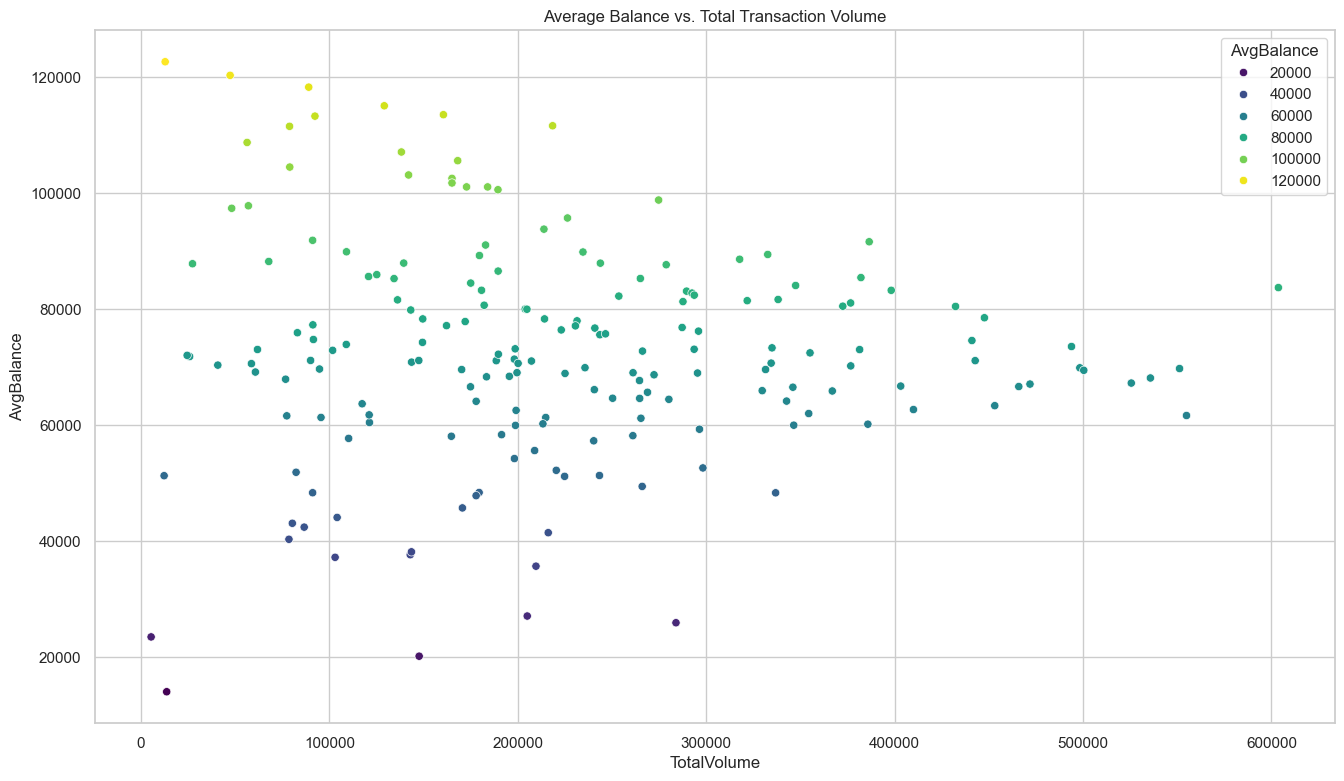

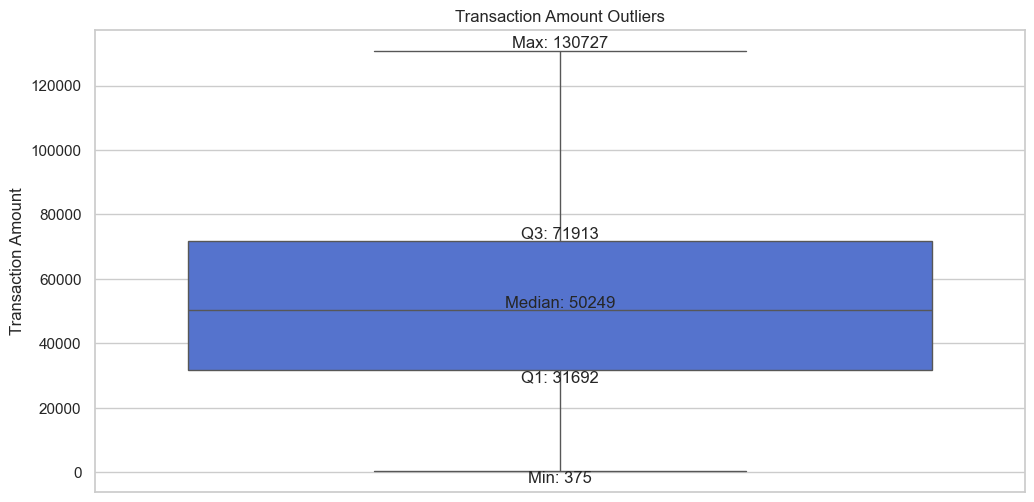

In [32]:
# a:) Scatter plot of average balance vs total volume :

plt.figure(figsize=(16, 9))
sns.scatterplot(data=cust_summary, x='TotalVolume', y='AvgBalance', hue='AvgBalance', palette='viridis')
plt.title('Average Balance vs. Total Transaction Volume')
s=140,          #  medium dot size
alpha=0.9

plt.show()



## b:) transaction  amount outliers :
import numpy as np

plt.figure(figsize=(12,6))

ax = sns.boxplot(
    y=df["TransactionAmount"],
    color="royalblue"
)

plt.title("Transaction Amount Outliers")
plt.ylabel("Transaction Amount")
plt.xlabel("")

# ---- Calculate statistics ----
data = df["TransactionAmount"].dropna()

q1 = np.percentile(data, 25)
median = np.percentile(data, 50)
q3 = np.percentile(data, 75)
min_val = data.min()
max_val = data.max()

# ---- Add labels ----
ax.text(0, median, f"Median: {median:.0f}", ha="center", va="bottom")
ax.text(0, q1, f"Q1: {q1:.0f}", ha="center", va="top")
ax.text(0, q3, f"Q3: {q3:.0f}", ha="center", va="bottom")
ax.text(0, min_val, f"Min: {min_val:.0f}", ha="center", va="top")
ax.text(0, max_val, f"Max: {max_val:.0f}", ha="center", va="bottom")

plt.show()

Task 6: Hypothesis Testing 

● Test whether high-volume transaction accounts have statistically higher average balances than low-volume accounts.

● Conduct hypothesis testing based on segmentation.

In [33]:
# step 6.1 ● Test whether high-volume transaction accounts have statistically higher average balances than low-volume accounts.
from scipy import stats

# Segment by volume
q70 = cust_summary["TotalVolume"].quantile(0.70)
q30 = cust_summary["TotalVolume"].quantile(0.30)

high_vol = cust_summary[cust_summary["TotalVolume"] >= q70]["AvgBalance"].dropna()
low_vol  = cust_summary[cust_summary["TotalVolume"] <= q30]["AvgBalance"].dropna()

# Welch's t-test
t_stat, p_val = stats.ttest_ind(high_vol, low_vol, equal_var=False)

t_stat, p_val

(np.float64(-0.386478657678767), np.float64(0.7001935724836169))

In [34]:
# step 6.2 ● Conduct hypothesis testing based on segmentation.
df["AccountBalance"] = pd.to_numeric(df["AccountBalance"], errors="coerce")
txn_count = (
    df.groupby("CustomerID")
      .size()
      .reset_index(name="Transaction_Count")
)


In [35]:
df = df.drop(columns=["Transaction_Count"], errors="ignore")
df = df.merge(txn_count, on="CustomerID", how="left")

In [36]:
median_txn = df["Transaction_Count"].median()

df["Customer_Segment"] = df["Transaction_Count"].apply(
    lambda x: "High Volume" if x > median_txn else "Low Volume"
)

In [37]:
high_volume_bal = df[df["Customer_Segment"] == "High Volume"]["AccountBalance"].dropna()
low_volume_bal = df[df["Customer_Segment"] == "Low Volume"]["AccountBalance"].dropna()

In [38]:
from scipy.stats import ttest_ind


t_stat, p_value = ttest_ind(
    high_volume_bal,
    low_volume_bal,
    equal_var=False
)

t_stat, p_value

if p_value < 0.05:
    print("Reject Null Hypothesis: Significant difference exists")
else:
    print("Fail to Reject Null Hypothesis: No significant difference")

Fail to Reject Null Hypothesis: No significant difference


task 7:  Video Presentation

● Record a short video summarizing findings and insights.

● Highlight what drives customer transaction behavior and financial risk.

● Discuss data-backed recommendations for customer engagement or monitoring.

First video: ***<a href="https://www.loom.com/share/a1ad878bafdd4acdb96cf046a666225a"> Goldman Sachs Presentation video no. I  </a>***

Second video:***<a href="https://www.loom.com/share/8175e55f2e4043f48a135d491f4264fb">Goldman Sachs Presentation video no. II</a>***